In [226]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import collections
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
import re
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
# nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

%matplotlib inline
pd.set_option('display.max_colwidth', 100)

In [227]:
# Load dataset
def load_data():
    data = pd.read_csv('../data/tweets_10-24-2020.csv')
    return data


In [228]:
tweet_df = load_data()
tweet_df.head()

,id,text,isRetweet,isDeleted,device,favorites,retweets,date
0,98454970654916608,Republicans and Democrats have both created our economic problems.,f,f,TweetDeck,49,255,2011-08-02 18:07:48
1,1234653427789070336,"I was thrilled to be back in the Great city of Charlotte, North Carolina with thousands of hardw...",f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50
2,1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance court obtained by CBS News questions where there ...,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47
3,1304875170860015617,"The Unsolicited Mail In Ballot Scam is a major threat to our Democracy, &amp; the Democrats know...",f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58
4,1218159531554897920,RT @MZHemingway: Very friendly telling of events here about Comey's apparent leaking to complian...,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59


In [229]:
print('Dataset size:',tweet_df.shape)
print('Columns are:',tweet_df.columns)


Dataset size: (54442, 8)
Columns are: Index(['id', 'text', 'isRetweet', 'isDeleted', 'device', 'favorites',
       'retweets', 'date'],
      dtype='object')


In [230]:
# Filtering - Removing Retweets
tweet_df = tweet_df.loc[tweet_df['isRetweet'] == 'f']
# Remove Columns
tweet_df = tweet_df[["id", "text"]]
tweet_df.head()

,id,text
0,98454970654916608,Republicans and Democrats have both created our economic problems.
1,1234653427789070336,"I was thrilled to be back in the Great city of Charlotte, North Carolina with thousands of hardw..."
3,1304875170860015617,"The Unsolicited Mail In Ballot Scam is a major threat to our Democracy, &amp; the Democrats know..."
5,1319761576996573186,"THANK YOU to all of the Great American Patriots in The Villages, Florida! #MAGA https://t.co/CNE..."
7,1315779944002199552,"“I’m running as a proud Democrat, for the Senate”. Sleepy Joe Biden today. It’s only going to ge..."


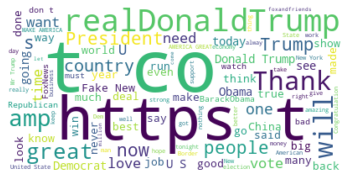

In [231]:
# Generate WordCloud
tweet_string = " ".join(tweet for tweet in tweet_df["text"])
tweet_wordcloud = WordCloud(background_color="white",
                              max_words=100,
                             ).generate(tweet_string)
# view the wordcloud
plt.imshow(tweet_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [232]:
special_words = ["realdonaldtrump", "amp", "u", '', 'url']

def remove_punct(text):
    """
    takes in string
    :param text:
    :return:
    """
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

def tokenization(text):
    """

    :param text: Takes in string
    :return: List of strings
    """
    text = re.split('\W+', text)
    return text

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

def remove_special_words(text):
    text = [word for word in text if word not in special_words]
    return text


def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

def replace_username(txt):
    return re.sub(r'@\w+','@USER ', txt)

def replace_url(txt):
    return re.sub(r'http\S+','_URL_ ', txt)

def replace_hashtag(txt):
    return re.sub(r'#\w+','_HASHTAG_ ', txt)

def remove_url(txt):
    """Replace URLs found in a text string with nothing
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

def count_urls(text):
    pass

# def count_users(text):

In [233]:
tweet_df.head()

,id,text
0,98454970654916608,Republicans and Democrats have both created our economic problems.
1,1234653427789070336,"I was thrilled to be back in the Great city of Charlotte, North Carolina with thousands of hardw..."
3,1304875170860015617,"The Unsolicited Mail In Ballot Scam is a major threat to our Democracy, &amp; the Democrats know..."
5,1319761576996573186,"THANK YOU to all of the Great American Patriots in The Villages, Florida! #MAGA https://t.co/CNE..."
7,1315779944002199552,"“I’m running as a proud Democrat, for the Senate”. Sleepy Joe Biden today. It’s only going to ge..."


In [234]:
# tweet_df['text_nourl'] = tweet_df['text'].apply(lambda x: remove_url(x))
tweet_df['text_nourl'] = tweet_df['text'].apply(lambda x: replace_url(x))
tweet_df['text_nourl'] = tweet_df['text_nourl'].apply(lambda x: replace_username(x))
print(tweet_df['text_nourl'].str.count("@USER").sum())

# Count User Mentions/URLS
tweet_df['user_count'] = tweet_df['text_nourl'].str.count("@USER")
tweet_df['url_count'] = tweet_df['text_nourl'].str.count("_URL_")

# tweet_df.head()
# Remove usernames
tweet_df['Tweet_punct'] = tweet_df['text_nourl'].apply(lambda x: remove_punct(x))
tweet_df['Tweet_tokenized'] = tweet_df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
tweet_df['Tweet_nonstop'] = tweet_df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
# tweet_df['Tweet_stemmed'] = tweet_df['Tweet_nonstop'].apply(lambda x: stemming(x))
tweet_df['Tweet_lemmatized'] = tweet_df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
tweet_df['tweet_cleaned'] = tweet_df['Tweet_lemmatized'].apply(lambda x: remove_special_words(x))

tweet_df.head()


41349


,id,text,text_nourl,user_count,url_count,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_lemmatized,tweet_cleaned
0,98454970654916608,Republicans and Democrats have both created our economic problems.,Republicans and Democrats have both created our economic problems.,0,0,Republicans and Democrats have both created our economic problems,"[republicans, and, democrats, have, both, created, our, economic, problems]","[republicans, democrats, created, economic, problems]","[republican, democrat, created, economic, problem]","[republican, democrat, created, economic, problem]"
1,1234653427789070336,"I was thrilled to be back in the Great city of Charlotte, North Carolina with thousands of hardw...","I was thrilled to be back in the Great city of Charlotte, North Carolina with thousands of hardw...",0,1,I was thrilled to be back in the Great city of Charlotte North Carolina with thousands of hardwo...,"[i, was, thrilled, to, be, back, in, the, great, city, of, charlotte, north, carolina, with, tho...","[thrilled, back, great, city, charlotte, north, carolina, thousands, hardworking, american, patr...","[thrilled, back, great, city, charlotte, north, carolina, thousand, hardworking, american, patri...","[thrilled, back, great, city, charlotte, north, carolina, thousand, hardworking, american, patri..."
3,1304875170860015617,"The Unsolicited Mail In Ballot Scam is a major threat to our Democracy, &amp; the Democrats know...","The Unsolicited Mail In Ballot Scam is a major threat to our Democracy, &amp; the Democrats know...",0,0,The Unsolicited Mail In Ballot Scam is a major threat to our Democracy amp the Democrats know it...,"[the, unsolicited, mail, in, ballot, scam, is, a, major, threat, to, our, democracy, amp, the, d...","[unsolicited, mail, ballot, scam, major, threat, democracy, amp, democrats, know, almost, recent...","[unsolicited, mail, ballot, scam, major, threat, democracy, amp, democrat, know, almost, recent,...","[unsolicited, mail, ballot, scam, major, threat, democracy, democrat, know, almost, recent, elec..."
5,1319761576996573186,"THANK YOU to all of the Great American Patriots in The Villages, Florida! #MAGA https://t.co/CNE...","THANK YOU to all of the Great American Patriots in The Villages, Florida! #MAGA _URL_",0,1,THANK YOU to all of the Great American Patriots in The Villages Florida MAGA URL,"[thank, you, to, all, of, the, great, american, patriots, in, the, villages, florida, maga, url, ]","[thank, great, american, patriots, villages, florida, maga, url, ]","[thank, great, american, patriot, village, florida, maga, url, ]","[thank, great, american, patriot, village, florida, maga]"
7,1315779944002199552,"“I’m running as a proud Democrat, for the Senate”. Sleepy Joe Biden today. It’s only going to ge...","“I’m running as a proud Democrat, for the Senate”. Sleepy Joe Biden today. It’s only going to ge...",0,0,“I’m running as a proud Democrat for the Senate” Sleepy Joe Biden today It’s only going to get w...,"[, i, m, running, as, a, proud, democrat, for, the, senate, sleepy, joe, biden, today, it, s, on...","[, running, proud, democrat, senate, sleepy, joe, biden, today, going, get, worse, sustainable, ...","[, running, proud, democrat, senate, sleepy, joe, biden, today, going, get, worse, sustainable, ...","[running, proud, democrat, senate, sleepy, joe, biden, today, going, get, worse, sustainable, co..."


In [235]:
# Count Most Common
words_in_tweet = [tweet.lower().split() for tweet in tweet_df['text']]
all_words_no_urls = list(itertools.chain(*tweet_df['tweet_cleaned']))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('user', 41173),
 ('great', 7043),
 ('trump', 6226),
 ('thank', 3212),
 ('president', 3128),
 ('people', 2943),
 ('country', 2455),
 ('get', 2270),
 ('would', 2128),
 ('thanks', 2081),
 ('new', 2079),
 ('time', 2020),
 ('job', 2000),
 ('america', 1982),
 ('big', 1886)]

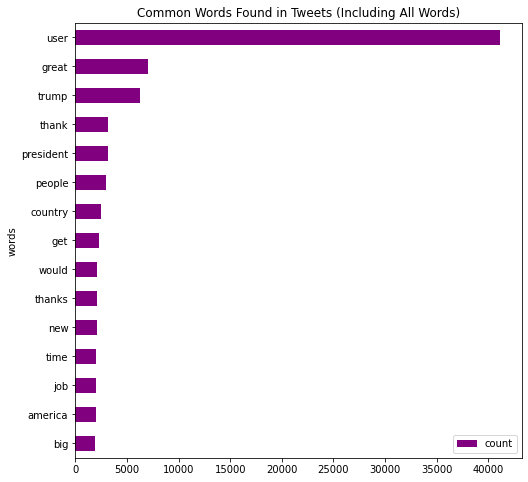

In [236]:
# Create Chart
fig, ax = plt.subplots(figsize=(8, 8))

clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()


In [237]:
tweet_df.info()
# tweet_df.loc[(tweet_df['tweet_cleaned']>=100) & (df['Age']< 60) & (df['FT_Team'].str.startswith('S')),['Name','FT_Team']]
tweet_df[tweet_df["tweet_cleaned"].apply(lambda x: 'user' in x)]
#Filter by item in list in pandas cell

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45270 entries, 0 to 54441
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                45270 non-null  int64 
 1   text              45270 non-null  object
 2   text_nourl        45270 non-null  object
 3   user_count        45270 non-null  int64 
 4   url_count         45270 non-null  int64 
 5   Tweet_punct       45270 non-null  object
 6   Tweet_tokenized   45270 non-null  object
 7   Tweet_nonstop     45270 non-null  object
 8   Tweet_lemmatized  45270 non-null  object
 9   tweet_cleaned     45270 non-null  object
dtypes: int64(3), object(7)
memory usage: 3.8+ MB


,id,text,text_nourl,user_count,url_count,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_lemmatized,tweet_cleaned
36,1293619029836468224,$13.9M is heading to New Orleans in @USDOT funding for @NewOrleansRTA! Happy to support bus serv...,$13.9M is heading to New Orleans in @USER funding for @USER ! Happy to support bus service and ...,2,0,M is heading to New Orleans in USER funding for USER Happy to support bus service and major fl...,"[m, is, heading, to, new, orleans, in, user, funding, for, user, happy, to, support, bus, servic...","[heading, new, orleans, user, funding, user, happy, support, bus, service, major, fleet, improve...","[heading, new, orleans, user, funding, user, happy, support, bus, service, major, fleet, improve...","[heading, new, orleans, user, funding, user, happy, support, bus, service, major, fleet, improve..."
63,1266799941273350145,"Much more “disinformation” coming out of CNN, MSDNC, @nytimes and @washingtonpost, by far, than ...","Much more “disinformation” coming out of CNN, MSDNC, @USER and @USER , by far, than coming out ...",2,0,Much more “disinformation” coming out of CNN MSDNC USER and USER by far than coming out of any...,"[much, more, disinformation, coming, out, of, cnn, msdnc, user, and, user, by, far, than, coming...","[much, disinformation, coming, cnn, msdnc, user, user, far, coming, foreign, country, even, comb...","[much, disinformation, coming, cnn, msdnc, user, user, far, coming, foreign, country, even, comb...","[much, disinformation, coming, cnn, msdnc, user, user, far, coming, foreign, country, even, comb..."
84,1263124870055018501,Crazy Bernie Sanders is not a fighter. He gives up too easy! The Dem establishment gets Alfred E...,Crazy Bernie Sanders is not a fighter. He gives up too easy! The Dem establishment gets Alfred E...,1,0,Crazy Bernie Sanders is not a fighter He gives up too easy The Dem establishment gets Alfred E N...,"[crazy, bernie, sanders, is, not, a, fighter, he, gives, up, too, easy, the, dem, establishment,...","[crazy, bernie, sanders, fighter, gives, easy, dem, establishment, gets, alfred, e, newman, mayo...","[crazy, bernie, sander, fighter, give, easy, dem, establishment, get, alfred, e, newman, mayor, ...","[crazy, bernie, sander, fighter, give, easy, dem, establishment, get, alfred, e, newman, mayor, ..."
113,1284225001659523077,I am proud to announce $2 million for the @Sept11Memorial in NYC! This special site ensures that...,I am proud to announce $2 million for the @USER in NYC! This special site ensures that the memo...,1,0,I am proud to announce million for the USER in NYC This special site ensures that the memory o...,"[i, am, proud, to, announce, million, for, the, user, in, nyc, this, special, site, ensures, tha...","[proud, announce, million, user, nyc, special, site, ensures, memory, nearly, people, killed, te...","[proud, announce, million, user, nyc, special, site, ensures, memory, nearly, people, killed, te...","[proud, announce, million, user, nyc, special, site, ensures, memory, nearly, people, killed, te..."
114,1268685511755026432,Great to be with our wonderful Men and Women of the @SecretService. What a job they are doing! h...,Great to be with our wonderful Men and Women of the @USER . What a job they are doing! _URL_,1,1,Great to be with our wonderful Men and Women of the USER What a job they are doing URL,"[great, to, be, with, our, wonderful, men, and, women, of, the, user, what, a, job, they, are, d...","[great, wonderful, men, women, user, job, url, ]","[great, wonderful, men, woman, user, job, url, ]","[great, wonderful, men, woman, user, job]"
...,...,...,...,...,...,...,...,...,...,...
54372,1081357291914477568,"Great new book by Dr. Robert Jeffress, “Choosing the Extraordinary Life.” Get it and enjoy! @Lo...","Great new book by Dr. Robert Jeffress, “Choosing the Extraordinary Life.” Get it and enjoy! @USER",1,0,Great new book by Dr Robert Jeffress “Choosing the Extraordinary Life” Get it and enjoy USER,"[great, new, book, by, dr